In [3]:
import torch
import matplotlib.pyplot as plt

In [ ]:
x = torch.randn(1000,8)
x, y = x.split(-1,6)
print(x.shape)
print(y.shape)

In [238]:
D = 2
C = 3
centers = torch.Tensor([[0,0]])
print(centers)

s = 1
scales = torch.Tensor([s])
print(scales)

tensor([[0., 0.]])
tensor([1.])


In [239]:
x = torch.linspace(-1,1,100)
xx, yy = torch.meshgrid(x, x)
x = torch.cat([xx.flatten()[:,None], yy.flatten()[:,None]], dim=-1)
print(x.shape)

torch.Size([10000, 2])


In [240]:
size = (x.shape[0], centers.shape[0], centers.shape[1])
xin = x.unsqueeze(1).expand(size)
c = centers.unsqueeze(0).expand(size)
diff = xin - c
print(diff.shape)

eps = scales[None,:]

g_exp = torch.exp(-diff.pow(2).sum(-1)*eps) # B x C

phi11 = -(4.0*(eps**2) * (diff[:,:,1]**2)-2*eps) * g_exp
phi12 =   4.0*(eps**2) * g_exp * diff[:,:,0] * diff[:,:,1]
phi22 = -(4.0*(eps**2) * (diff[:,:,0]**2)-2*eps) * g_exp
print(phi11.shape)

torch.Size([10000, 1, 2])
torch.Size([10000, 1])


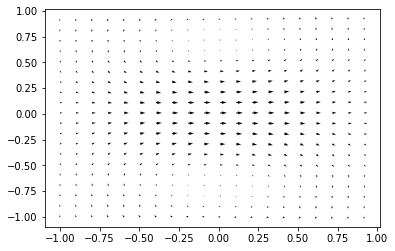

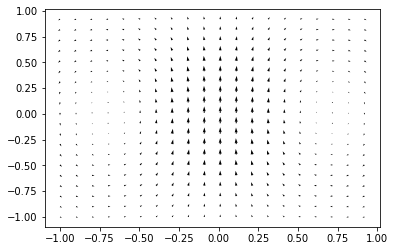

In [241]:
c = 0
u1 = phi11.sum(-1)
u2 = phi12.sum(-1)

s = 5
plt.quiver(xx[::s,::s], yy[::s,::s],
           u1.reshape(100,100)[::s,::s], u2.reshape(100,100)[::s,::s], scale=100)
plt.show()

v1 = phi12.sum(-1)
v2 = phi22.sum(-1)

plt.quiver(xx[::s,::s], yy[::s,::s], 
           v1.reshape(100,100)[::s,::s], v2.reshape(100,100)[::s,::s], scale=100)
plt.show()

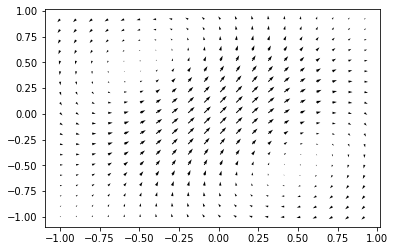

In [242]:
uvx = u1+v1
uvy = u2+v2

plt.quiver(xx[::s,::s], yy[::s,::s], 
           uvx.reshape(100,100)[::s,::s], uvy.reshape(100,100)[::s,::s], scale=100)
plt.show()